In [47]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mptlb

%matplotlib inline

In [48]:
dataset_column_names = ['Area', 'Perimeter', 'Compactness', 'Length of Kernel', 'Width of Kernel', 'Asymmetry Coeffecient', 'Length of Kernel Groove', 'Class']
dataset = pd.read_csv('./seeds_dataset.txt', sep = '\s+', names = dataset_column_names)

In [49]:
dataset.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coeffecient,Length of Kernel Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [50]:
dataset.corr()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coeffecient,Length of Kernel Groove,Class
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
Compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
Length of Kernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
Width of Kernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
Asymmetry Coeffecient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
Length of Kernel Groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Class,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [51]:
dataset.shape

(210, 8)

In [52]:
dataset["Class"].unique()

array([1, 2, 3])

In [53]:
dataset['Class'].value_counts()

3    70
2    70
1    70
Name: Class, dtype: int64

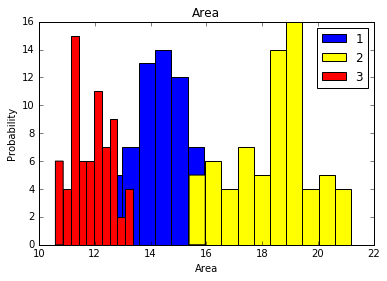

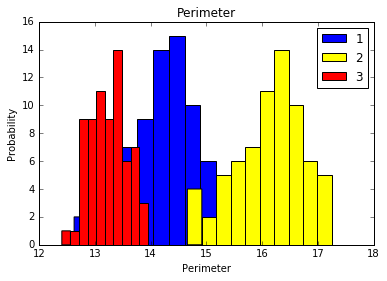

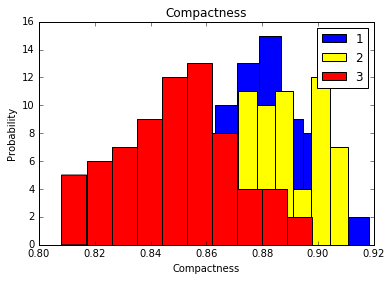

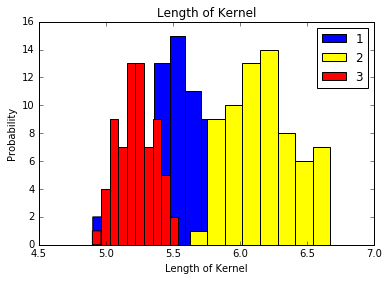

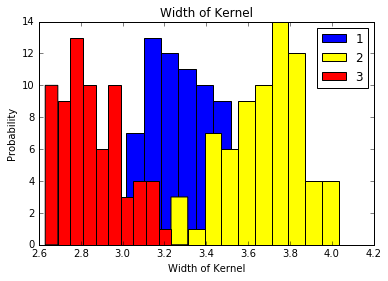

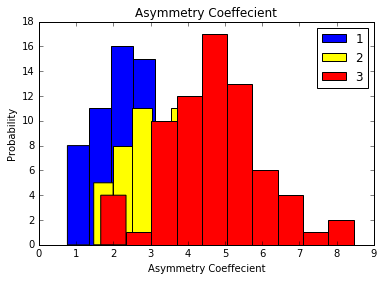

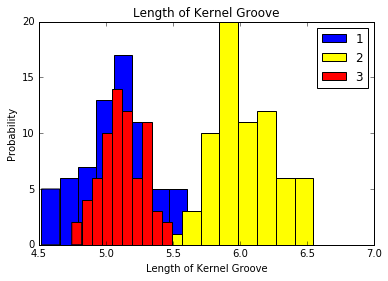

In [54]:
for label in dataset_column_names[:-1]:
    plt.hist(dataset[dataset['Class'] == 1][label], color = 'blue', label = '1')
    plt.hist(dataset[dataset['Class'] == 2][label], color = 'yellow', label = '2')
    plt.hist(dataset[dataset['Class'] == 3][label], color = 'red', label = '3')
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

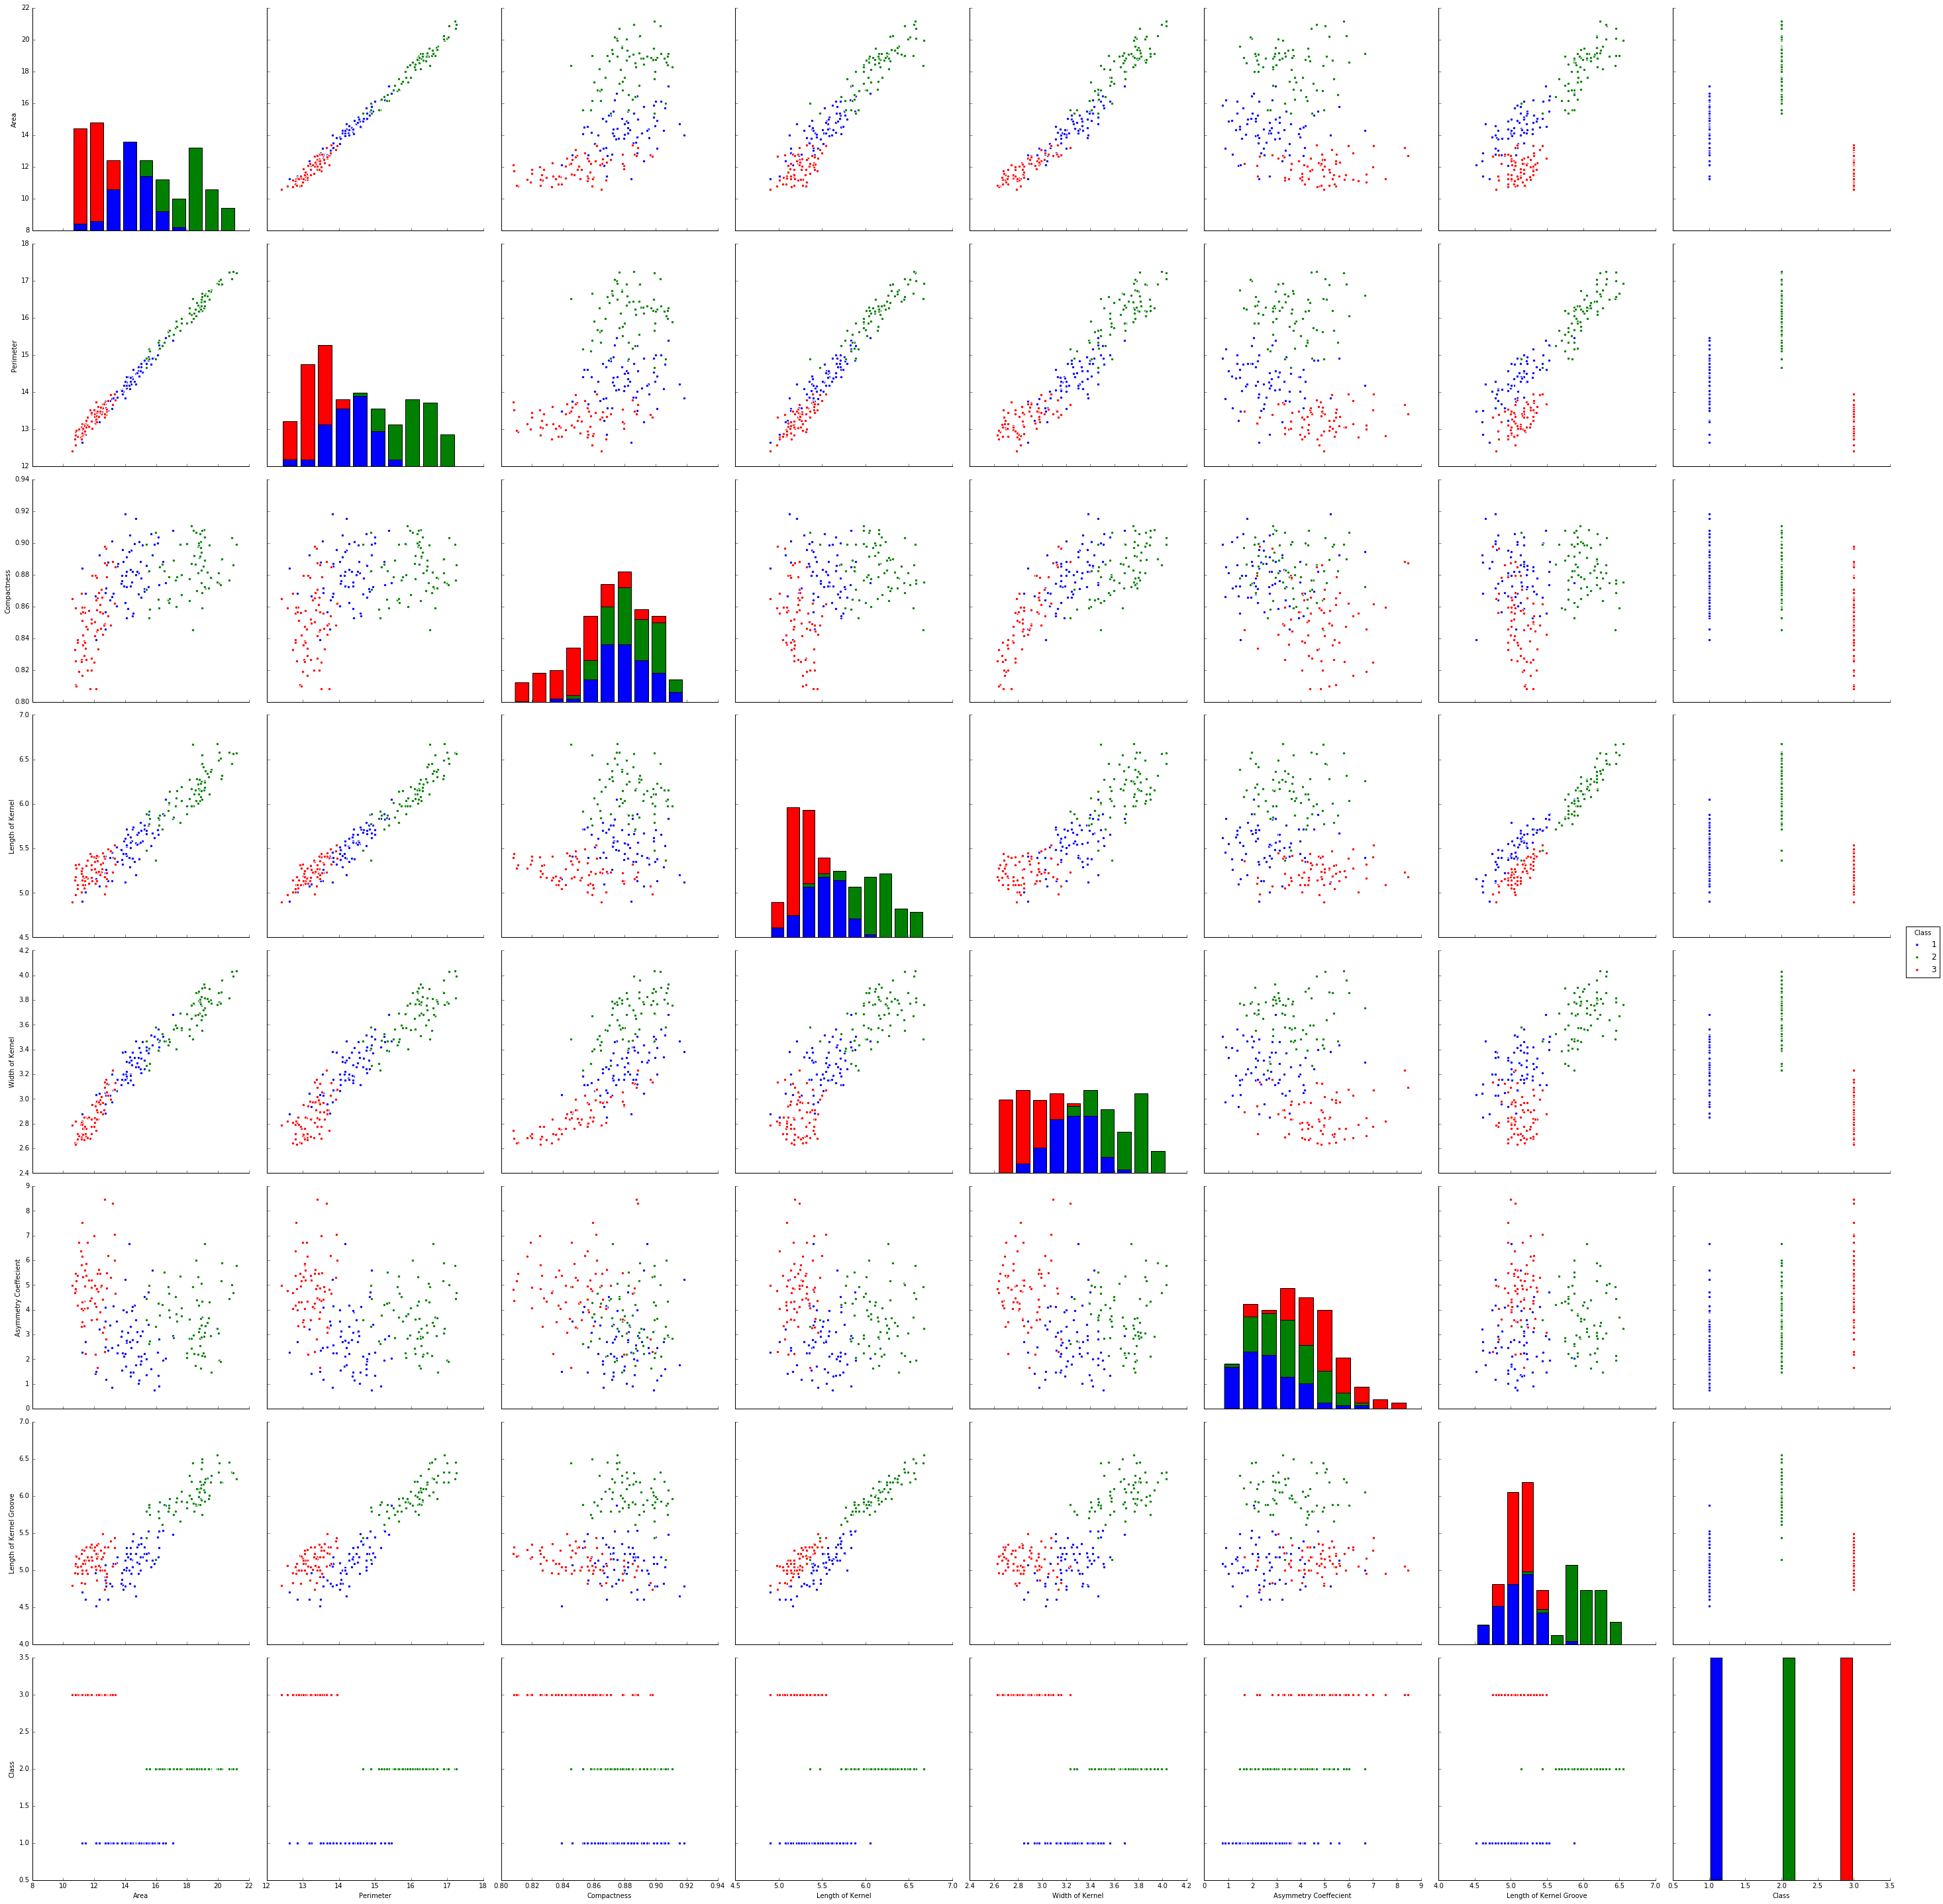

In [67]:
sb.pairplot(dataset, hue = 'Class', size = 5.0)

In [55]:
features = dataset.drop(['Class'], axis = 1)
target = dataset['Class']

In [56]:
features.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coeffecient,Length of Kernel Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [57]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [58]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [59]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 1)

In [60]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print(accuracy_score(knn_predictions, y_test))

0.928571428571


In [61]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)
logistic_regressor_predictions = logistic_regressor.predict(X_test)
print(accuracy_score(logistic_regressor_predictions, y_test))

0.97619047619
